# 1

In [29]:
#1.Clp

using JuMP,Clp

m = Model(solver=ClpSolver())

@variable(m, a>=0)
@variable(m, b>=0)
@variable(m, c)
@variable(m, d>=0)

@objective(m, Min, a+b-2*c+(1/3)*d)

@constraint(m, 5*a-3*b+d == 7)
@constraint(m, 2*a+b+c>=2)
@constraint(m, a >= b+0.5*c)

# solve(m)     # solve model
println(@time(solve(m)))                     # print time to solve model

println("Clp result: \$", getobjectivevalue(m))


  0.000503 seconds (70 allocations: 5.422 KiB)
Optimal
Clp result: $-4.199999999999999


In [26]:
#1.ECOS

using JuMP, ECOS

n = Model(solver=ECOSSolver())

@variable(n, a>=0)
@variable(n, b>=0)
@variable(n, c)
@variable(n, d>=0)

@objective(n, Min, a+b-2*c+(1/3)*d)

@constraint(n, 5*a-3*b+d == 7)
@constraint(n, 2*a+b+c>=2)
@constraint(n, a >= b+0.5*c)

# solve(m)     # solve model
println(@time(solve(n)))                     # print time to solve model

println("ECOS result: \$", getobjectivevalue(n))


  0.000622 seconds (534 allocations: 34.281 KiB)
Optimal
ECOS result: $-4.2000000000124205

ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -4.716e+00  -1.499e+00  +4e+01  5e-01  5e-01  1e+00  7e+00    ---    ---    1  1  - |  -  - 
 1  -4.213e+00  -3.640e+00  +3e+00  3e-02  3e-02  4e-01  6e-01  0.9485  4e-02   1  1  1 |  0  0
 2  -4.201e+00  -4.193e+00  +3e-02  3e-04  4e-04  6e-03  8e-03  0.9874  2e-04   1  1  1 |  0  0
 3  -4.200e+00  -4.200e+00  +4e-04  3e-06  4e-06  6e-05  9e-05  0.9890  1e-04   1  1  1 |  0  0
 4  -4.200e+00  -4.200e+00  +4e-06  4e-08  5e-08  7e-07  9e-07  0.9890  1e-04   1  1  0 |  0  0
 5  -4.200e+00  -4.200e+00  +5e-08  4e-10  5e-10  8e-09  1e-08  0.9890  1e-04   1  0  0 |  0  0
 6  -4.200e+00  -4.200e+00  +5e-10  5e-12  6e-12  9e-11  1e-10  0.9890  1e-04   1  0  0 |  0  0

OPTIMAL (within feastol=5.6e-12, reltol=1.2e-10, a

In [24]:
#1.SCS
using JuMP,SCS

p = Model(solver=SCSSolver())

@variable(p, a>=0)
@variable(p, b>=0)
@variable(p, c)
@variable(p, d>=0)

@objective(p, Min, a+b-2*c+(1/3)*d)

@constraint(p, 5*a-3*b+d == 7)
@constraint(p, 2*a+b+c>=2)
@constraint(p, a >= b+0.5*c)

# solve(m)     # solve model
println(@time(solve(p)))                     # print time to solve model

println("SCS result: \$", getobjectivevalue(p))

  0.001131 seconds (464 allocations: 31.469 KiB)
Optimal
SCS result: $-4.200000098790088
----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 12, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 4, constraints m = 6
Cones:	primal zero / dual free vars: 1
	linear vars: 5
Setup time: 9.69e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.00e+19  3.02e+19  1.00e+00 -2.10e+20  5.08e+19  6.09e+19  4.95e-05 
    40| 8.89e-09  1.00e-08  3.21e-09 -4.20e+00 -4.20e+00  

## 1
1(a) The Clp solver is the most accurate
1(b) The Clp is the fastest, since Clp is designed to solve this kind of linear programming
1(c) perhaps the frame is different and they are specialized to solve different problems

# 2

In [39]:
#2
using JuMP,Clp

m= Model(solver=ClpSolver())

@variable(m,x>=0)
@variable(m,y>=0)

@objective(m,Max, 7*x+4*y)

@constraint(m, 9*x+6*y<=150)
@constraint(m, 5*x+2*y<=80)

println(@time(solve(m)))
println("Max rating: \$", getobjectivevalue(m))
println("Iron: \$", getvalue(x))
println("Leather: \$", getvalue(y))



  0.000912 seconds (70 allocations: 4.797 KiB)
Optimal
Max rating: $115.0
Iron: $15.000000000000004
Leather: $2.499999999999991


In [48]:
material_type = [:iron,:leather]
indice = [:cost,:weight]
protection = Dict(zip(material_type,[7,4]))
resource = Dict(zip(indice,[150,80]));

using NamedArrays
material_matrix = [9 5 
                    6 2 ]

recipe = NamedArray(material_matrix, (material_type, indice), ("material","indice"));

In [52]:
using JuMP,Clp

m= Model(solver=ClpSolver())

@variable(m, material[material_type] >= 0)

@expression(m, tot, sum(protection[i]*material[i] for i in material_type))

@constraint(m, constr[i in indice], sum(recipe[t,i]*material[t] for t in material_type)<= resource[i])

@objective(m, Max, tot)

status = solve(m)

println(getvalue(material))
println("Max protection: \$", getobjectivevalue(m))

material: 1 dimensions:
[   iron] = 15.000000000000004
[leather] = 2.499999999999991
Max protection: $115.0


## 2
both (a) and (b) get the answer 115
2(c)
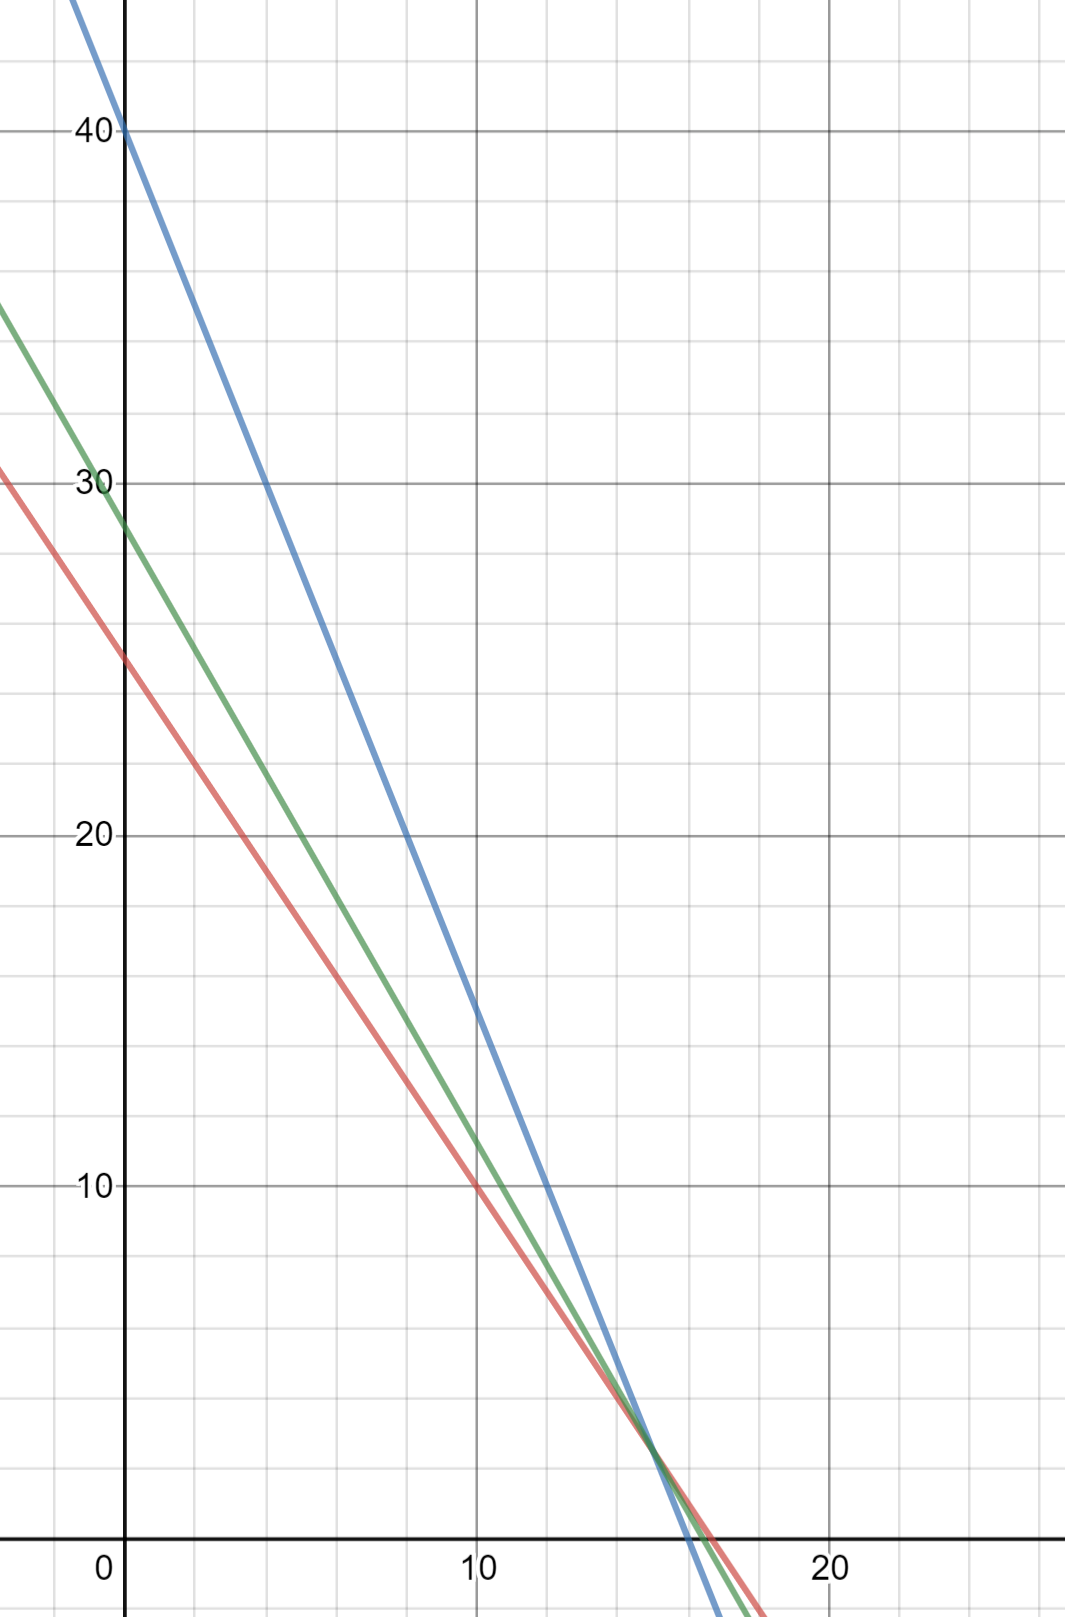


# 3

In [34]:
using JuMP,Clp

m = Model(solver=ClpSolver())

@variable(m, 0<= a<= 7)
@variable(m, b>=0)
@variable(m, c>=0)
@variable(m, 0<=d<=10)

@objective(m, Max, -a-16-7*b+7*c+d)

@constraint(m, -a-b+c<=-1)
@constraint(m, a-b+c+0.5*d <=10.5)
@constraint(m, -a+b-c-0.5*d <= -10.5)

println(@time(solve(m)))
println("a: \$",getvalue(a))
println("b: \$",getvalue(b))
println("c: \$",getvalue(c))
println("d: \$",getvalue(d))

println("x1: \$", getvalue(a)+1)
println("x2: \$", getvalue(b)-getvalue(c))
println("x3: \$", getvalue(d)-15)

println("LP: \$", getobjectivevalue(m))

  0.000612 seconds (70 allocations: 5.531 KiB)
Optimal
a: $5.75
b: $0.0
c: $4.75
d: $0.0
x1: $6.75
x2: $-4.75
x3: $-15.0
LP: $11.5


## 3
3(a)
max -a-16-7b+7c+d
-a-b+c<=-1
a-b+c+0.5d<=10.5
-a+b-c-0.5d<=-10.5
0<=a<=7
b>=0
c>=0
0<=d<=10

3(b)
x1 = a+1
x2 = b-c
x3 = d-15

3(c)
as the program printed
a=5.75, b=0.0, c=4.75,d=0.0
x1=6.75, x2=-4.75, x3=-15
objectvalue is -11.5
